In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib import rc

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [130]:
df = pd.read_csv('./titanic/train.csv')
df_test = pd.read_csv('./titanic/test.csv')


- PassengerId : 승객 번호
- Survived : 생존여부(1: 생존, 0 : 사망)
- Pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
- Name : 승객 이름
- Sex : 승객 성별
- Age : 승객 나이 
- SibSp : 동반한 형제자매, 배우자 수
- Patch : 동반한 부모, 자식 수
- Ticket : 티켓의 고유 넘버
- Fare 티켓의 요금
- Cabin : 객실 번호
- Embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)

In [52]:
def plot_value(ax):
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() * 1.02
        value = '%0.2f'%(p.get_height())
        ax.text(x, y, value, ha="center")
            
        

# 열 이름 소문자로 바꾸기

In [53]:
df.columns = [i.lower() for i in df.columns]

In [54]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

# 결측치 확인 

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
df.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

# 상관관계도 확인

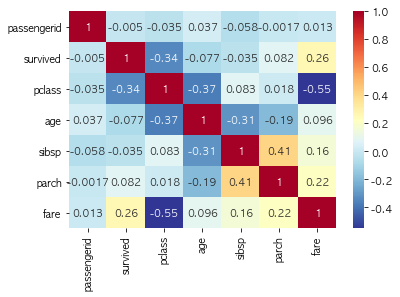

In [57]:
sns.heatmap(data = df.corr(), annot=True, cmap = 'RdYlBu_r');

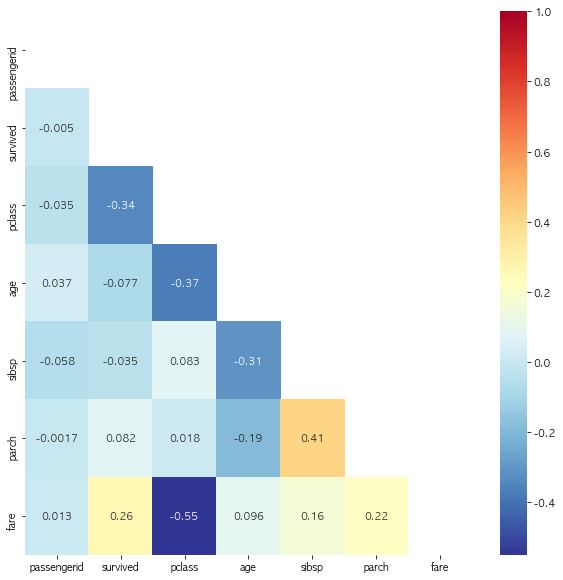

In [58]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10));
sns.heatmap(data = df.corr(), annot=True, cmap = 'RdYlBu_r', mask=mask,);
plt.show();

- pclass 별 survived
- fare 별 survived
- age 별 pclass
- parch - sibsp

In [59]:
df['embarked']= df['embarked'].astype('string')
df['embarked'] 

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: string

In [60]:
df['embarked'].isna().sum()

2

In [ ]:
pd.StringDtype()

# 생존률

## Pclass

In [61]:
df.groupby(['pclass', 'survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

### 클래스 별 탑승수

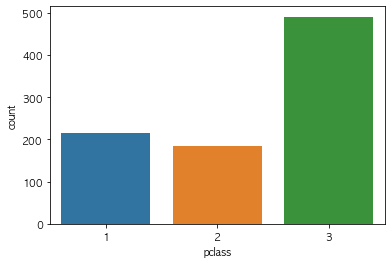

In [62]:
# 3등급 승객 탑승 카운트가 가장 높음
df3 = df.pclass.value_counts()
sns.countplot(x = df.pclass)
plt.show()

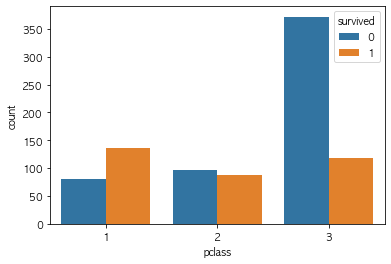

In [63]:
sns.countplot(x = 'pclass', hue = 'survived', data =df)

In [64]:
df.groupby('pclass')['survived'].count()
df.groupby('pclass')['survived'].mean()

pclass
1    216
2    184
3    491
Name: survived, dtype: int64

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

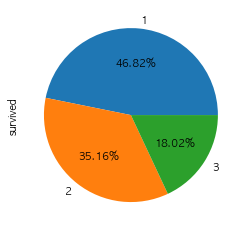

In [65]:
# 생존률은 높은 등급일 수록 상승함.. .?
df.groupby('pclass')['survived'].mean().plot.pie(autopct = '%0.2f%%')

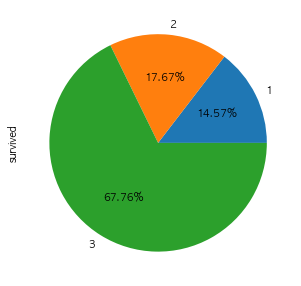

In [66]:
# 클래스 별 사망률
plt.figure(figsize=(5, 5));
df[df.survived == 0].groupby('pclass')['survived'].count().plot(kind = 'pie', autopct = '%0.2f%%');

### 나이 별 클래스

In [67]:
# 클래스 별 평균 나이
df.groupby('pclass')['age'].mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

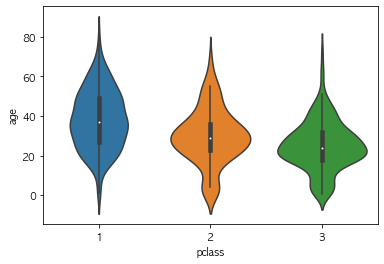

In [68]:
sns.violinplot(x = 'pclass', y = 'age', data = df)

## Fare

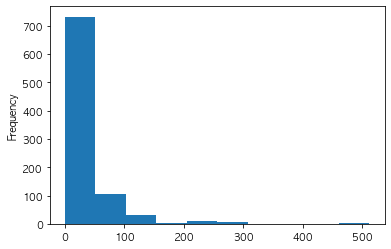

In [69]:
df.fare.plot(kind = 'hist')

In [70]:
df['fare_cut'] = pd.cut(df.fare, bins = 6)
df.head(1)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,fare_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,"(-0.512, 85.388]"


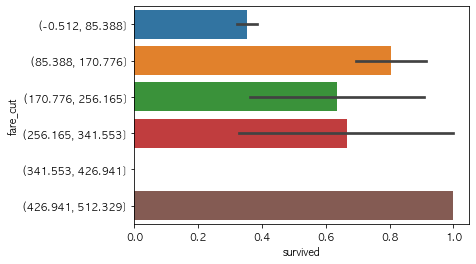

In [71]:
sns.barplot(x = 'survived', y = 'fare_cut', data = df)

## Port of Embarkation
C = Cherbourg, Q = Queenstown, S = Southampton

In [72]:
df.shape

(891, 13)

embarked  survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: survived, dtype: int64

embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64

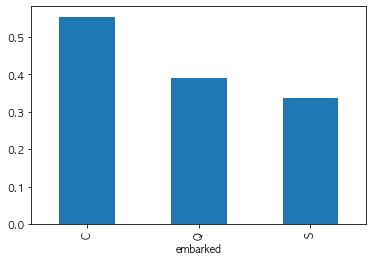

In [73]:
df.groupby(['embarked', 'survived'])['survived'].count()
df.groupby('embarked')['survived'].mean()
df.groupby('embarked')['survived'].mean().plot(kind= 'bar');
plt.show()

C가 부자동네인가?

In [74]:
df.groupby(['embarked', 'pclass'])['survived'].count()

embarked  pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: survived, dtype: int64

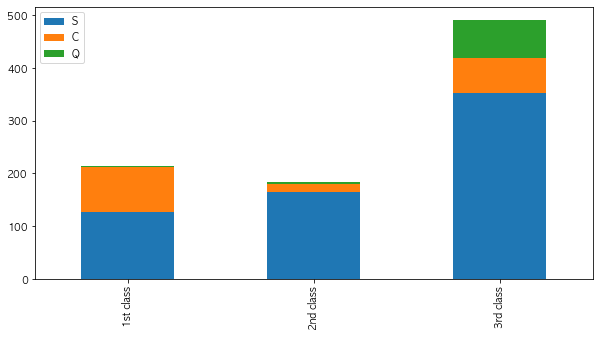

In [75]:
Pclass1 = df[df['pclass']==1]['embarked'].value_counts()
Pclass2 = df[df['pclass']==2]['embarked'].value_counts()
Pclass3 = df[df['pclass']==3]['embarked'].value_counts()
ndf = pd.DataFrame([Pclass1, Pclass2, Pclass3])
ndf.index = ['1st class', '2nd class', '3rd class']
ndf.plot(kind='bar', stacked=True, figsize=(10,5))

In [76]:
df.embarked.isna().sum()

2

## Sex

In [77]:
df.shape

(891, 13)

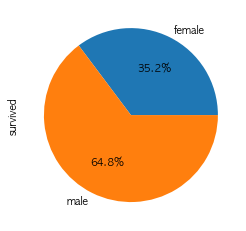

In [78]:
df.groupby('sex')['survived'].count().plot(kind = 'pie', autopct = '%1.1f%%')

In [79]:
'성별 별 생존수'
df.groupby(['sex', 'survived'])['survived'].count()
'생존률'
df.groupby('sex')['survived'].mean()

'성별 별 생존수'

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

'생존률'

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

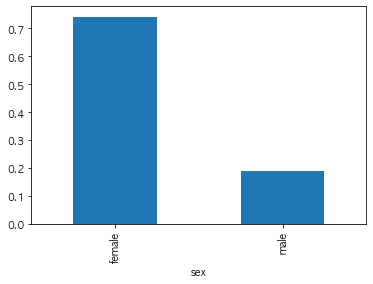

In [80]:
# 생존률 확인
df.groupby('sex')['survived'].mean().plot(kind='bar', x = 'sex')

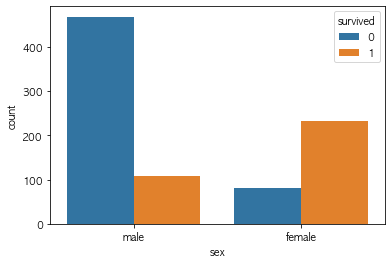

In [81]:
# 단순 카운트 그래프는 폐기함
sns.countplot(x = 'sex', hue = 'survived', data = df)

In [82]:
df.groupby('pclass')['age'].mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

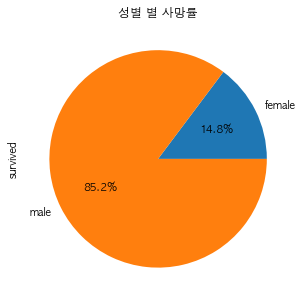

In [83]:
plt.figure(figsize=(5, 5));
plt.title('성별 별 사망률');

df[df.survived == 0].groupby('sex')['survived'].count().plot(kind = 'pie', autopct = '%1.1f%%');

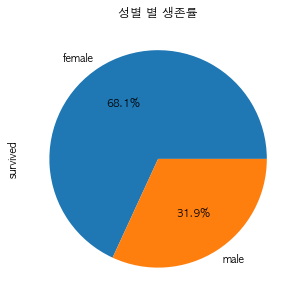

In [84]:
plt.figure(figsize=(5, 5));
plt.title('성별 별 생존률');

df[df.survived == 1].groupby('sex')['survived'].count().plot(kind = 'pie', autopct = '%1.1f%%');

### 기혼 여성과 미혼 여성의 생존률 차이

In [85]:
df.head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,fare_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.512, 85.388]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(-0.512, 85.388]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(-0.512, 85.388]"


In [89]:
df['name_title'] = df['name'].str.extract(r'(M[\w]+)\.', expand = False)
df.name_title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', nan, 'Mme', 'Ms', 'Major', 'Mlle'],
      dtype=object)

In [90]:
df.name_title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Major       2
Mlle        2
Mme         1
Ms          1
Name: name_title, dtype: int64

In [91]:
df[df.name_title == 'Miss']['survived'].mean()
df[df.name_title == 'Mrs']['survived'].mean()

0.6978021978021978

0.792

<Figure size 360x504 with 0 Axes>

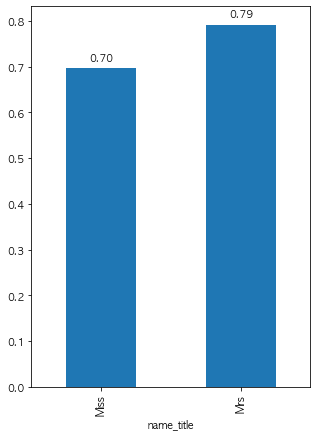

In [92]:
plt.figure(figsize=(5, 7))
result = df[(df.name_title == 'Miss') | (df.name_title == 'Mrs')].groupby('name_title')['survived'].mean().plot(kind = 'bar')

plot_value(result)

In [93]:
# 기혼이면 또 이제 패밀리를 봐야 하는데
# parch + sibsp = Family

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   passengerid  891 non-null    int64   
 1   survived     891 non-null    int64   
 2   pclass       891 non-null    int64   
 3   name         891 non-null    object  
 4   sex          891 non-null    object  
 5   age          714 non-null    float64 
 6   sibsp        891 non-null    int64   
 7   parch        891 non-null    int64   
 8   ticket       891 non-null    object  
 9   fare         891 non-null    float64 
 10  cabin        204 non-null    object  
 11  embarked     889 non-null    string  
 12  fare_cut     891 non-null    category
 13  name_title   870 non-null    object  
dtypes: category(1), float64(2), int64(5), object(5), string(1)
memory usage: 91.7+ KB


In [95]:
df[df.age.isna()].groupby('pclass')['pclass'].count()

pclass
1     30
2     11
3    136
Name: pclass, dtype: int64

In [96]:
df['age_cut'] = pd.cut(df.age, bins= 10)
df.age_cut

0      (16.336, 24.294]
1       (32.252, 40.21]
2      (24.294, 32.252]
3       (32.252, 40.21]
4       (32.252, 40.21]
             ...       
886    (24.294, 32.252]
887    (16.336, 24.294]
888                 NaN
889    (24.294, 32.252]
890    (24.294, 32.252]
Name: age_cut, Length: 891, dtype: category
Categories (10, interval[float64]): [(0.34, 8.378] < (8.378, 16.336] < (16.336, 24.294] < (24.294, 32.252] ... (48.168, 56.126] < (56.126, 64.084] < (64.084, 72.042] < (72.042, 80.0]]

<Figure size 720x720 with 0 Axes>

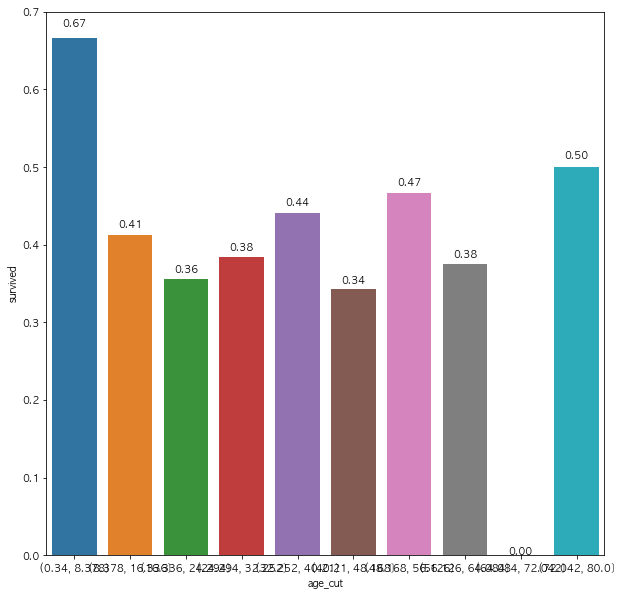

In [97]:
plt.figure(figsize = (10, 10))
result = sns.barplot(x = 'age_cut', y = 'survived', data = df, ci = 0)
plot_value(result)

In [98]:

df['family'] = df.sibsp + df.parch

In [99]:
df.family

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: family, Length: 891, dtype: int64

In [100]:
df[df.embarked.isna()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,fare_cut,name_title,age_cut,family
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,<NA>,"(-0.512, 85.388]",Miss,"(32.252, 40.21]",0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,<NA>,"(-0.512, 85.388]",Mrs,"(56.126, 64.084]",0


# 나이 - 클래스 별 평균값 삽입

In [101]:
df["age"].fillna(df.groupby('pclass')['age'].transform('mean'), inplace=True)

In [102]:
df.age.isna().sum()

0

In [103]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'fare_cut',
       'name_title', 'age_cut', 'family'],
      dtype='object')

In [104]:
tt_df = df[['survived','name', 'sex', 'age', 'fare', 'embarked', 'family', 'name_title']]
tt_df.head(2)

,survived,name,sex,age,fare,embarked,family,name_title
0,0,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1,Mrs


In [105]:
tt_df.name.str.extract(r'([\w]+\.)').iloc[:, 0].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
Countess.      1
Capt.          1
Lady.          1
Sir.           1
Don.           1
Mme.           1
Jonkheer.      1
Ms.            1
Name: 0, dtype: int64

In [124]:
import warnings
warnings.filterwarnings(action='ignore')

In [126]:
tt_df['name_title'] = tt_df.name.str.extract(r'([\w]+\.)').iloc[:, 0]

In [127]:
tt_df['name_title'] = tt_df.name_title.apply(lambda x: 'other' if x not in title else x)

In [111]:
pd.get_dummies(df.embarked)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [112]:
tt_df = pd.concat([tt_df, pd.get_dummies(df.embarked, prefix='embarked_')], axis = 1)

In [ ]:
train_df = remake()

In [288]:
def remake(df):
    age_dict = df.groupby('pclass')['age'].mean().to_dict()
    title = ['Mr.', 'Miss.', 'Mrs.', 'Master.']
    df.columns = [i.lower() for i in df.columns]
    df['embarked']= df['embarked'].astype('string')
    df['name_title'] = df['name'].str.extract(r'(M[\w]+)\.', expand = False)
    df['family'] = df.sibsp + df.parch
    
    tt_df = df.copy()
    tt_df['name_title'] = tt_df.name.str.extract(r'([\w]+\.)').iloc[:, 0]
    tt_df['name_title'] = tt_df.name_title.apply(lambda x: 'other' if x not in title else x)
    tt_df['name_title'] = tt_df.name_title.apply(lambda x: x.strip('.'))
    tt_df = pd.concat([tt_df, pd.get_dummies(df.embarked, prefix='embarked_')], axis = 1)
    
    tt_df.loc[(tt_df.pclass == 1) & (tt_df.age.isna()), 'age'] = '%0.2f' %age_dict[1]
    tt_df.loc[(tt_df.pclass == 2) & (tt_df.age.isna()), 'age'] = '%0.2f' %age_dict[2]
    tt_df.loc[(tt_df.pclass == 3) & (tt_df.age.isna()), 'age'] = '%0.2f' %age_dict[3]
    tt_df = pd.concat([tt_df, pd.get_dummies(tt_df.sex, prefix = 'sex_')], axis=1)
    tt_df = pd.concat([tt_df, pd.get_dummies(tt_df.name_title, prefix = 'nameTitle_')], axis=1)

    
    tt_df.drop(['sex', 'name_title'], axis=1, inplace =True)
    
    tt_df = tt_df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'family',
       'embarked__C', 'embarked__Q', 'embarked__S', 'sex__female', 'sex__male',
                  'nameTitle__Master', 'nameTitle__Miss', 'nameTitle__Mr',
       'nameTitle__Mrs', 'nameTitle__other'
                  ]]
    
    return tt_df

In [289]:
def remake_test(df):
    age_dict = df.groupby('pclass')['age'].mean().to_dict()
    title = ['Mr.', 'Miss.', 'Mrs.', 'Master.']
    df.columns = [i.lower() for i in df.columns]
    df['embarked']= df['embarked'].astype('string')
    df['name_title'] = df['name'].str.extract(r'(M[\w]+)\.', expand = False)
    df['family'] = df.sibsp + df.parch
    
    tt_df = df.copy()
    tt_df['name_title'] = tt_df.name.str.extract(r'([\w]+\.)').iloc[:, 0]
    tt_df['name_title'] = tt_df.name_title.apply(lambda x: 'other' if x not in title else x)
    tt_df['name_title'] = tt_df.name_title.apply(lambda x: x.strip('.'))
    tt_df = pd.concat([tt_df, pd.get_dummies(df.embarked, prefix='embarked_')], axis = 1)
    
    tt_df.loc[(tt_df.pclass == 1) & (tt_df.age.isna()), 'age'] = '%0.2f' %age_dict[1]
    tt_df.loc[(tt_df.pclass == 2) & (tt_df.age.isna()), 'age'] = '%0.2f' %age_dict[2]
    tt_df.loc[(tt_df.pclass == 3) & (tt_df.age.isna()), 'age'] = '%0.2f' %age_dict[3]
    
    tt_df = pd.concat([tt_df, pd.get_dummies(tt_df.sex, prefix = 'sex_')], axis=1)
    tt_df = pd.concat([tt_df, pd.get_dummies(tt_df.name_title, prefix = 'nameTitle_')], axis=1)

    
    tt_df.drop(['sex', 'name_title'], axis=1, inplace =True)
    
    
    tt_df = tt_df[['pclass', 'age', 'sibsp', 'parch','family',
       'embarked__C', 'embarked__Q', 'embarked__S', 'sex__female', 'sex__male',
                   'nameTitle__Master', 'nameTitle__Miss', 'nameTitle__Mr','nameTitle__Mrs', 'nameTitle__other']]
    
    return tt_df

In [290]:
remake_test(df).columns

Index(['pclass', 'age', 'sibsp', 'parch', 'family', 'embarked__C',
       'embarked__Q', 'embarked__S', 'sex__female', 'sex__male',
       'nameTitle__Master', 'nameTitle__Miss', 'nameTitle__Mr',
       'nameTitle__Mrs', 'nameTitle__other'],
      dtype='object')

In [291]:
remake_test(df)

,pclass,age,sibsp,parch,family,embarked__C,embarked__Q,embarked__S,sex__female,sex__male,nameTitle__Master,nameTitle__Miss,nameTitle__Mr,nameTitle__Mrs,nameTitle__other
0,3,22,1,0,1,0,0,1,0,1,0,0,1,0,0
1,1,38,1,0,1,1,0,0,1,0,0,0,0,1,0
2,3,26,0,0,0,0,0,1,1,0,0,1,0,0,0
3,1,35,1,0,1,0,0,1,1,0,0,0,0,1,0
4,3,35,0,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,0,0,0,1,0,1,0,0,0,0,1
887,1,19,0,0,0,0,0,1,1,0,0,1,0,0,0
888,3,25.14,1,2,3,0,0,1,1,0,0,1,0,0,0
889,1,26,0,0,0,1,0,0,0,1,0,0,1,0,0


In [292]:
# Homework

In [293]:
for i in zip(train_df[['pclass', 'age']]):
    print(i)

('pclass',)
('age',)


In [279]:
# homework Done

In [294]:
train_data = remake(df)

In [297]:
train_label = train_data.survived
del train_data['survived']

In [299]:
test_data = remake_test(df_test)

In [ ]:
pd.get_dummies(train_data)

In [ ]:
tr

In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [301]:
def train_and_test(model):
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_data, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [303]:
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100)) # ?
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

Accuracy :  83.05 %
Accuracy :  76.88 %
Accuracy :  85.41 %
Accuracy :  94.16 %
Accuracy :  80.81 %
